In [6]:
import numpy as np # linear algebra   (https://justpaste.it/dttl9)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras import  callbacks
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
%matplotlib inline

# for Interactive Shells
from IPython.display import display

#removing warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [7]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# File path
file_path = "/content/drive/MyDrive/Churn_Modelling.csv"

# Read CSV file with setting 'RowNumber' column as index
df = pd.read_csv(file_path, index_col='RowNumber')

# Display the first few rows of the DataFrame
print(df.head())



Mounted at /content/drive
           CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# some columns are totally unproductive so let's remove them
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [11]:
# some columns have text data so let's one hot encode them
#  for more on one hot encoding click this link below
df = pd.get_dummies(prefix='Geo',data=df,columns=['Geography'])

In [12]:
df = df.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [13]:
print(df.head())

           CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
RowNumber                                                               
1                  619       1   42       2       0.00              1   
2                  608       1   41       1   83807.86              1   
3                  502       1   42       8  159660.80              3   
4                  699       1   39       1       0.00              2   
5                  850       1   43       2  125510.82              1   

           HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geo_France  \
RowNumber                                                                   
1                  1               1        101348.88       1           1   
2                  0               1        112542.58       0           0   
3                  1               0        113931.57       1           1   
4                  0               0         93826.63       0           1   
5                  1      

In [14]:
df.shape

(10000, 13)

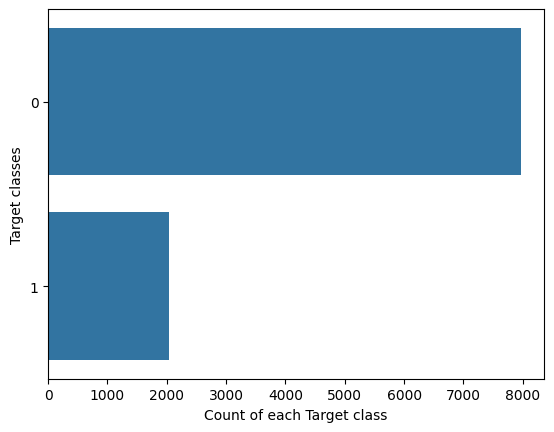

In [16]:
sns.countplot(y=df.Exited ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

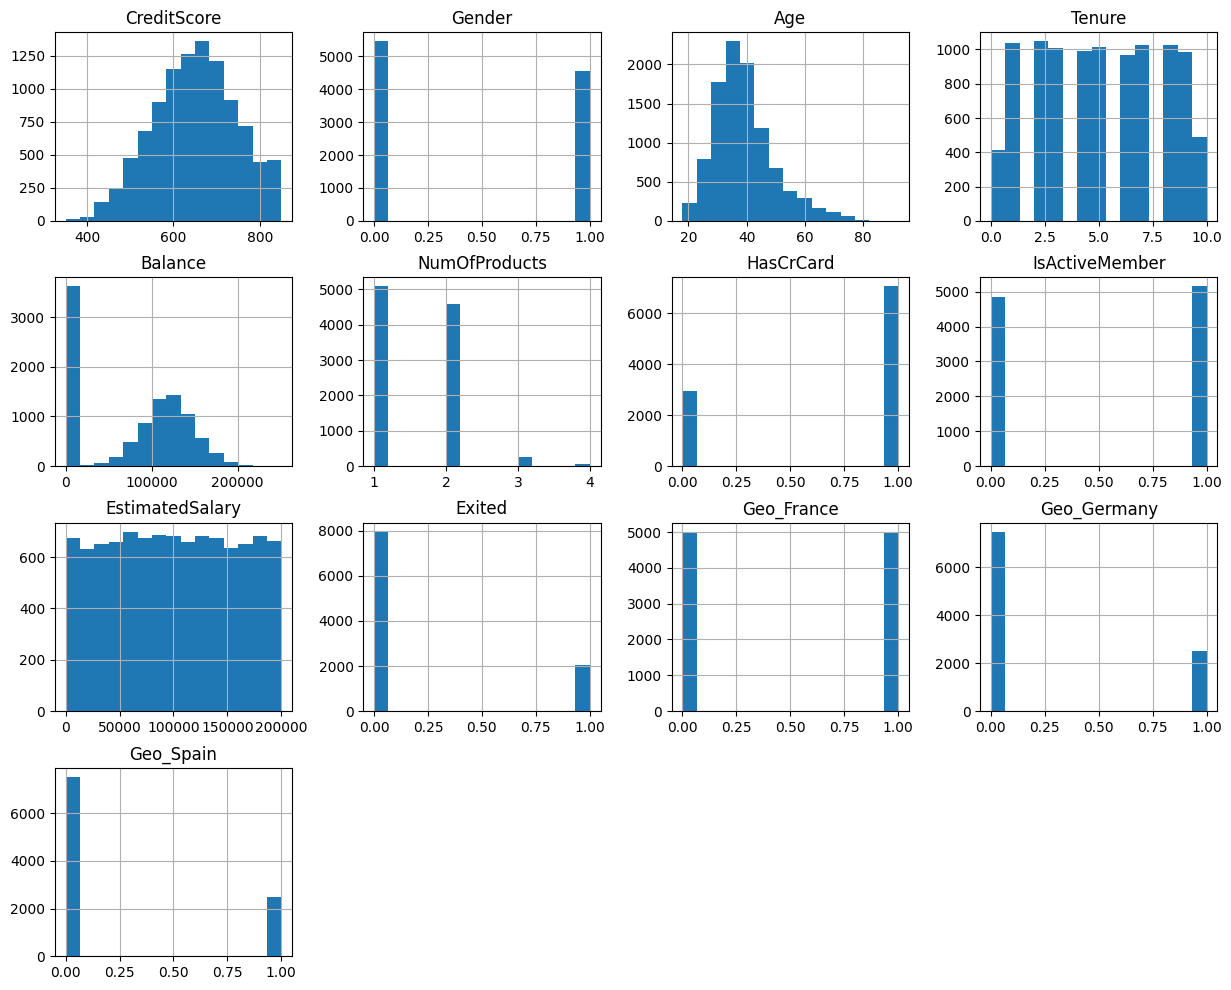

In [17]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

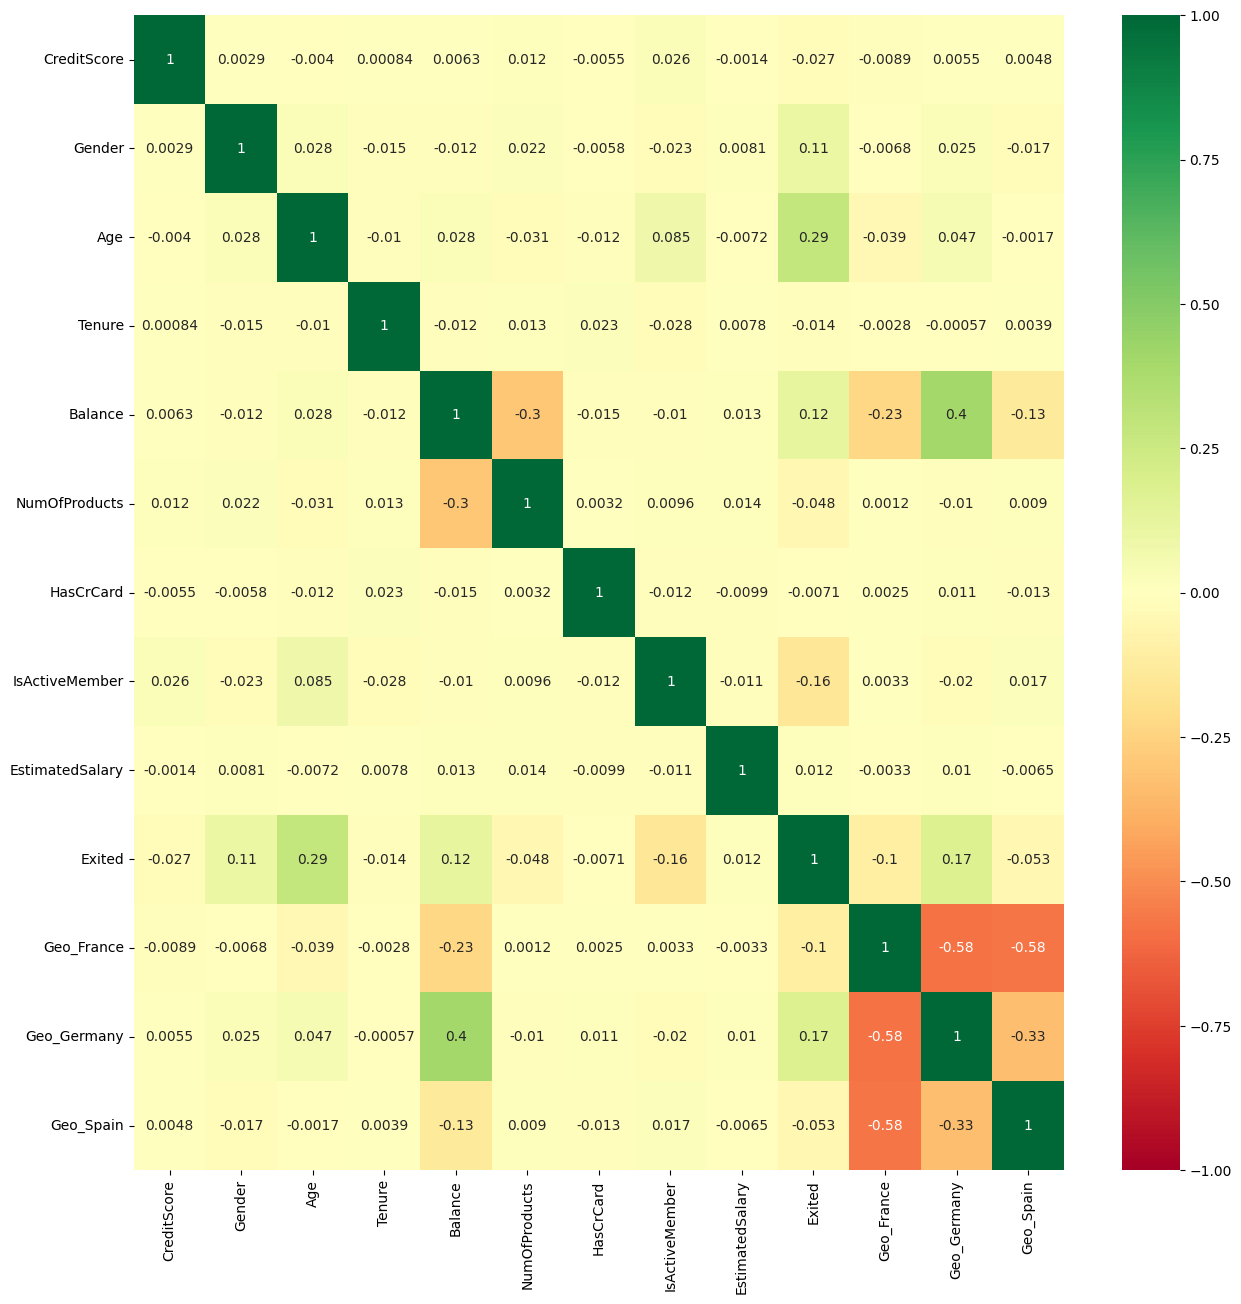

In [18]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0, vmax=1.0, vmin=-1.0)

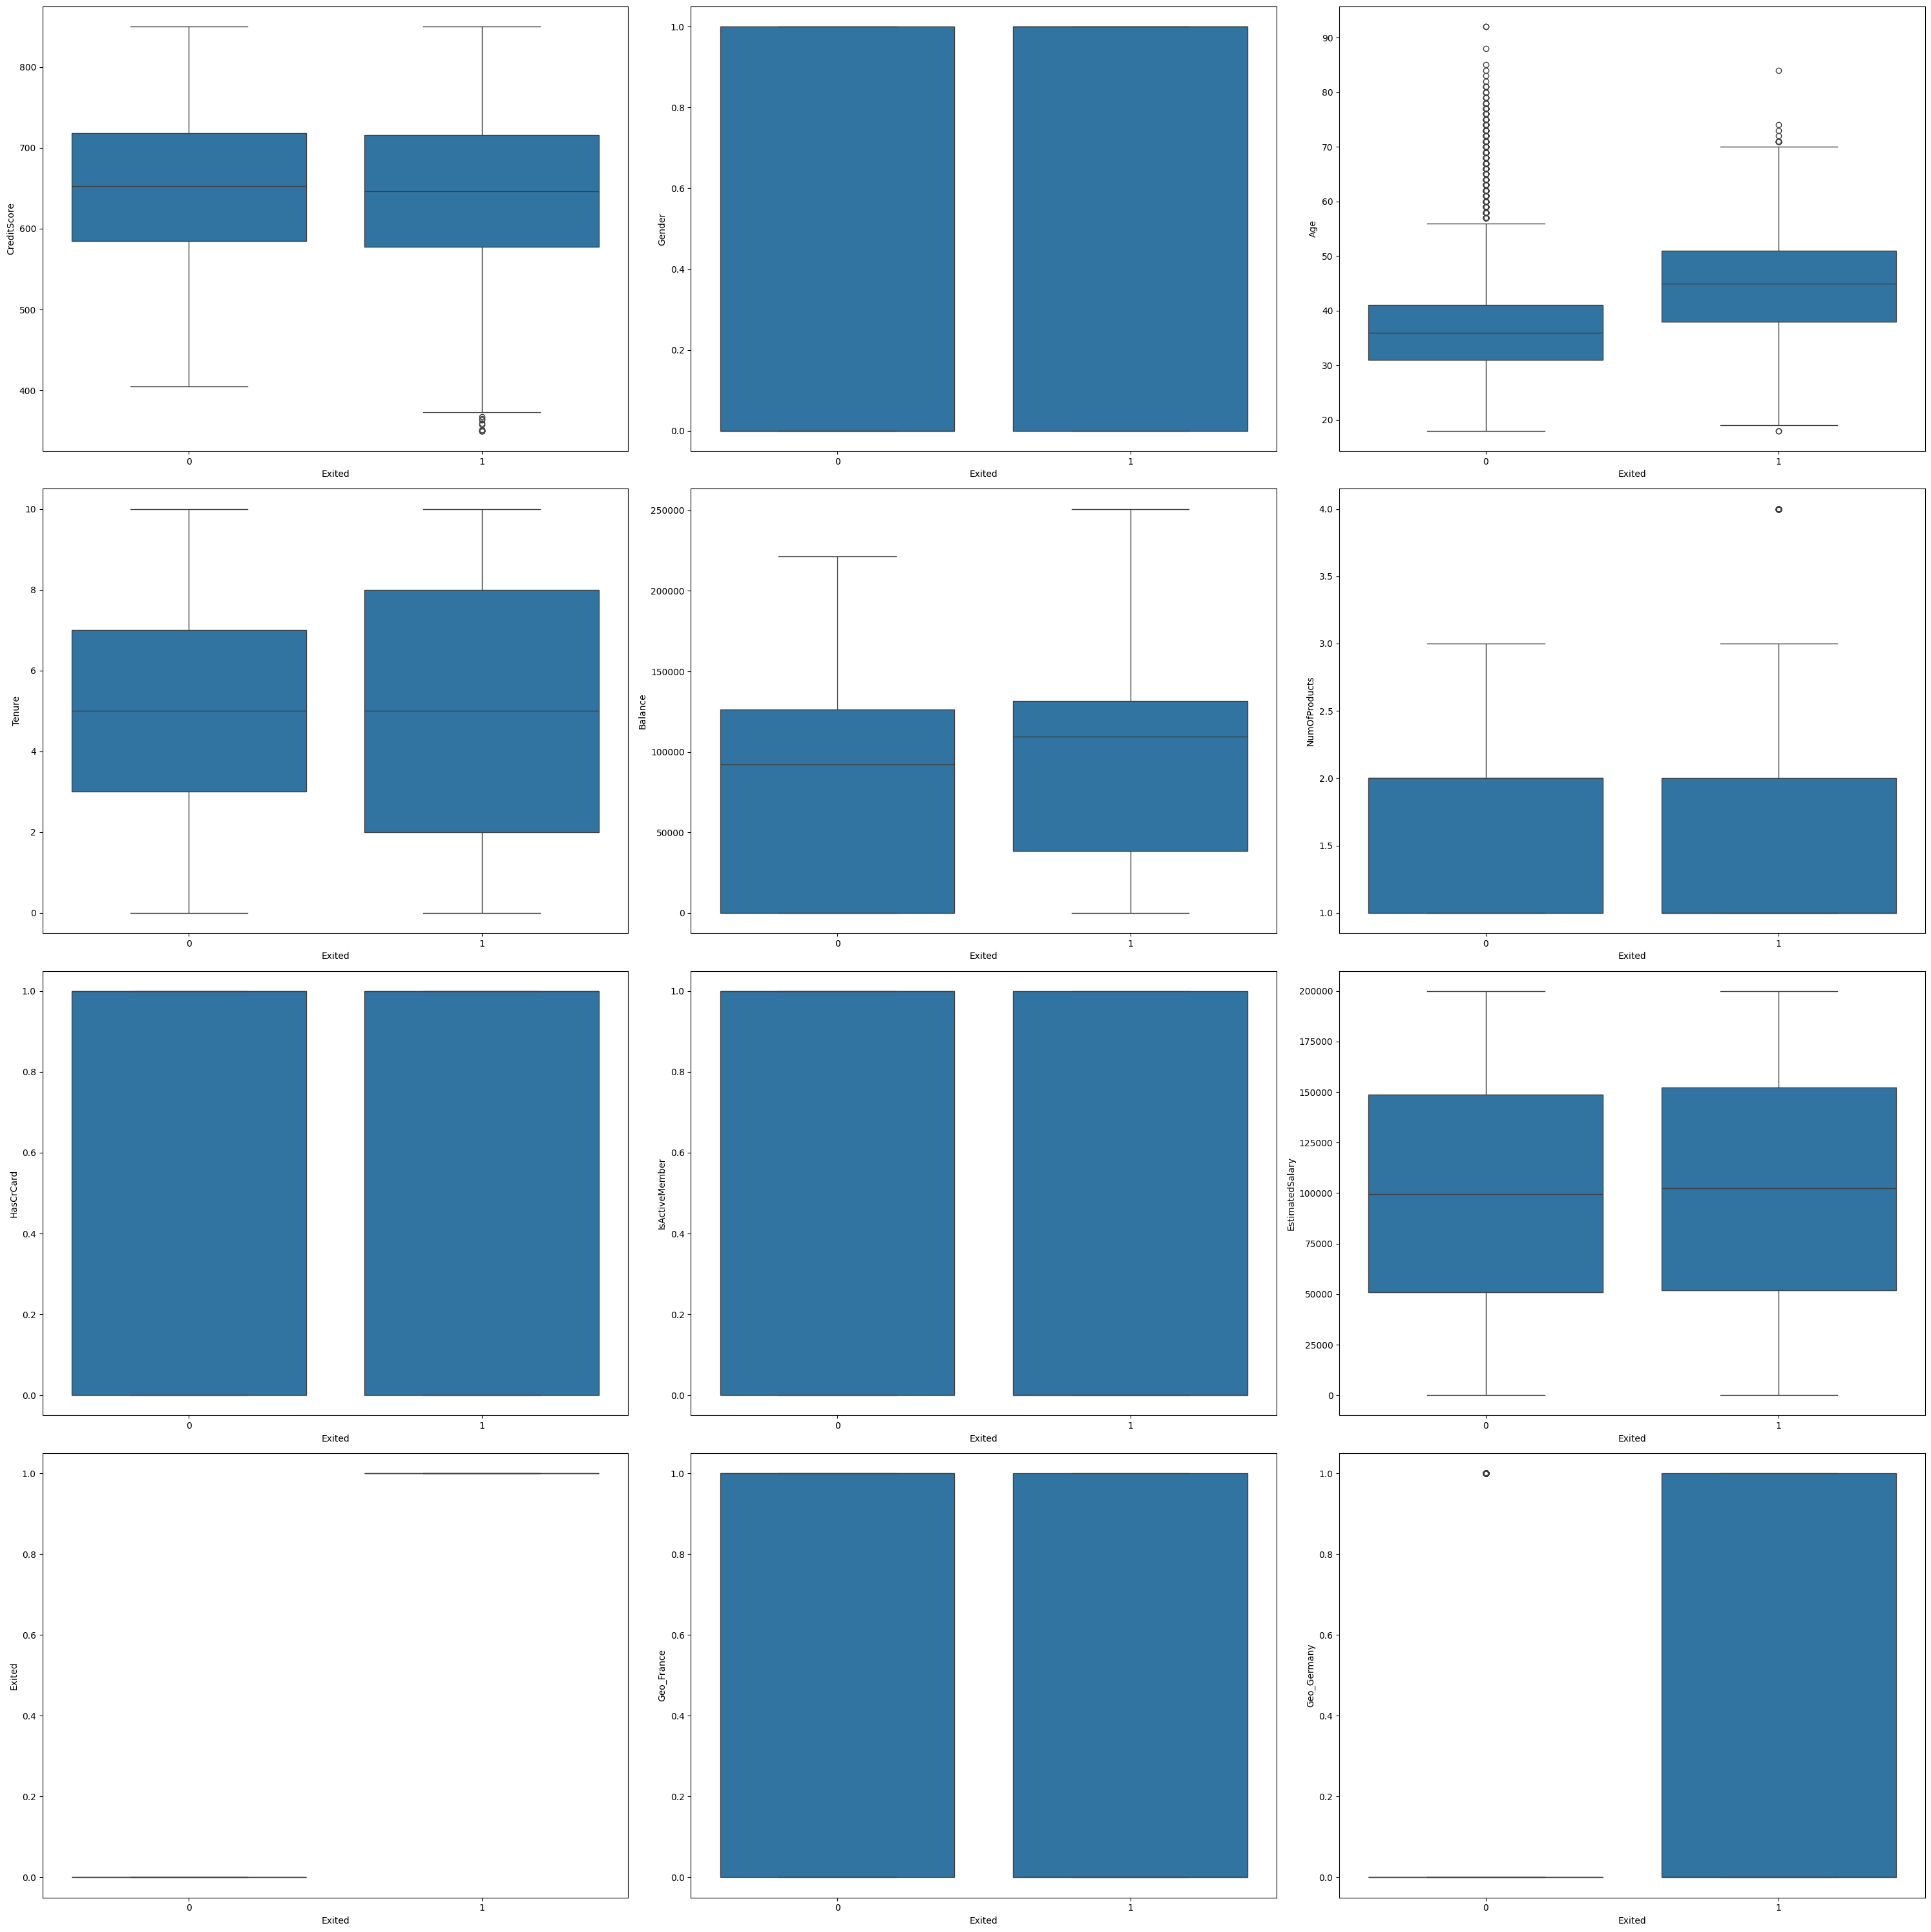

In [19]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Exited'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

In [20]:
y = df.Exited
X = df.drop(['Exited'],axis=1)

In [21]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [22]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Deep Learning


In [23]:
# sequential model to initialise our ann and dense module to build the layers
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 100,
                kernel_initializer = 'uniform',
                activation = 'relu',
                input_dim = 12))


model.add(Dense(units = 150,
                kernel_initializer = 'uniform',
                activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1,
                kernel_initializer = 'uniform',
                activation = 'sigmoid'))

In [24]:
# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1300      
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 16601 (64.85 KB)
Trainable params: 16601 (64.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Fitting the ANN to the Training set
EPOCHS = 100
BATCH_SIZE  = 64 # 2, 4,8,16,32, 64, 128, 274


# train model
H = model.fit(X_train,
              y_train,
              batch_size = BATCH_SIZE,
              epochs = EPOCHS,
              validation_split=0.2,
              verbose = 1)

Epoch 1/100
84/84 [==============================] - 1s 6ms/step - loss: 0.5054 - accuracy: 0.7959 - val_loss: 0.4300 - val_accuracy: 0.8000
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.8009 - val_loss: 0.4191 - val_accuracy: 0.8149
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.8175 - val_loss: 0.4117 - val_accuracy: 0.8246
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8259 - val_loss: 0.4026 - val_accuracy: 0.8321
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8310 - val_loss: 0.3977 - val_accuracy: 0.8321
Epoch 6/100
84/84 [==============================] - 0s 4ms/step - loss: 0.3916 - accuracy: 0.8394 - val_loss: 0.3899 - val_accuracy: 0.8403
Epoch 7/100
84/84 [==============================] - 0s 5ms/step - loss: 0.3673 - accuracy: 0.8526 - val_loss: 0.3517 - val_accuracy: 0.8537
Epoch 8/100
8

In [27]:
H.history

{'loss': [0.5054206252098083,
  0.4279637038707733,
  0.4185708165168762,
  0.4113529622554779,
  0.40395116806030273,
  0.39163821935653687,
  0.36733290553092957,
  0.3458881080150604,
  0.34257543087005615,
  0.33612194657325745,
  0.3343668580055237,
  0.33121857047080994,
  0.330698698759079,
  0.32768046855926514,
  0.32722043991088867,
  0.3239397406578064,
  0.32494404911994934,
  0.3244441747665405,
  0.31988102197647095,
  0.31879425048828125,
  0.3188290596008301,
  0.3159615993499756,
  0.3144964277744293,
  0.3124900162220001,
  0.3105103671550751,
  0.3100596070289612,
  0.30788570642471313,
  0.30925291776657104,
  0.3066798448562622,
  0.30124157667160034,
  0.3010735511779785,
  0.30003607273101807,
  0.2974388599395752,
  0.294113427400589,
  0.29531192779541016,
  0.29138389229774475,
  0.2906985580921173,
  0.28889885544776917,
  0.28660956025123596,
  0.2864842116832733,
  0.28331857919692993,
  0.2833561599254608,
  0.28000330924987793,
  0.2789205014705658,
  0.2

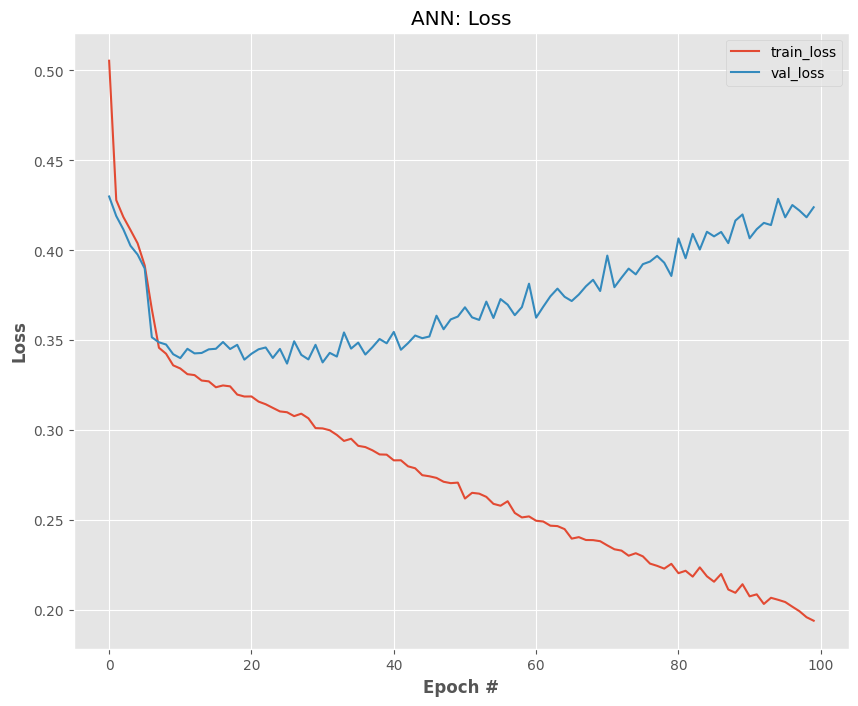

In [28]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("ANN: Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

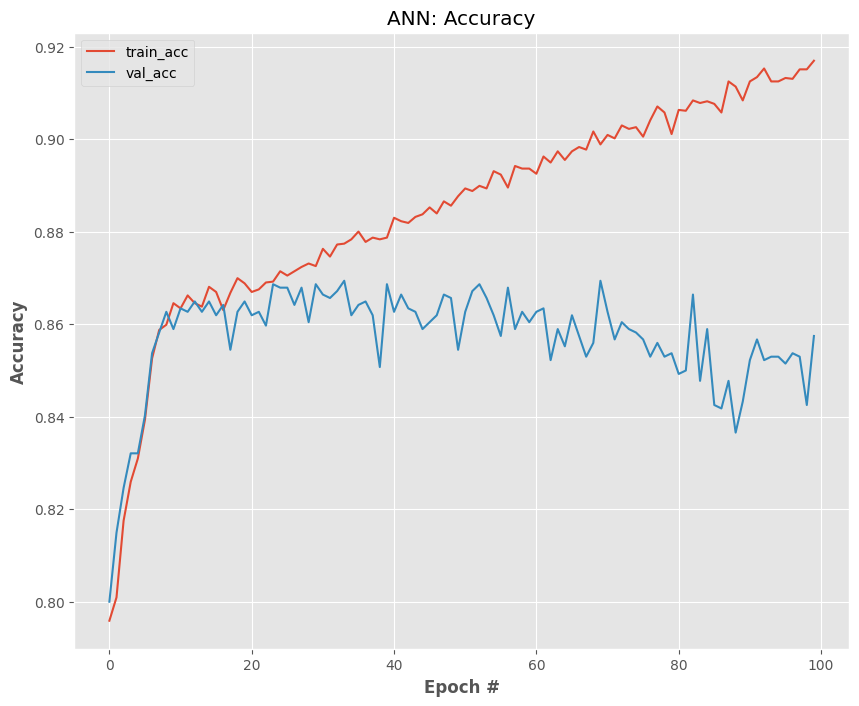

In [29]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("ANN: Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [30]:
score, acc = model.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)


670/670 [==============================] - 1s 2ms/step - loss: 0.2318 - accuracy: 0.9099
Train score: 0.23177742958068848
Train accuracy: 0.9098507165908813


In [31]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

104/104 [==============================] - 0s 2ms/step
********************
330/330 [==============================] - 1s 2ms/step - loss: 0.4594 - accuracy: 0.8400
Test score: 0.4593827426433563
Test accuracy: 0.8399999737739563


In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Evaluation Metrics

Text(0.5, 23.52222222222222, 'Predicted label')

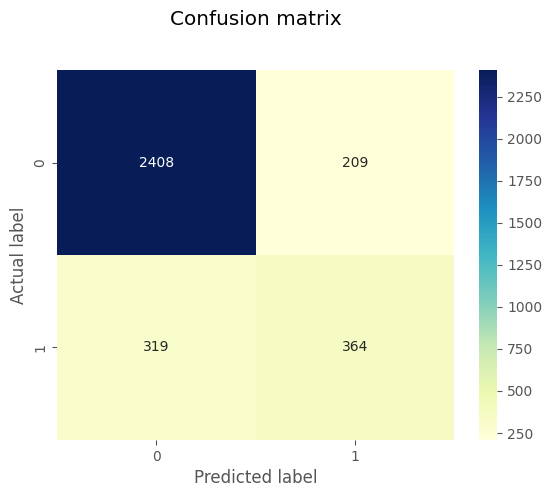

In [33]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2617
           1       0.64      0.53      0.58       683

    accuracy                           0.84      3300
   macro avg       0.76      0.73      0.74      3300
weighted avg       0.83      0.84      0.83      3300



104/104 [==============================] - 0s 1ms/step


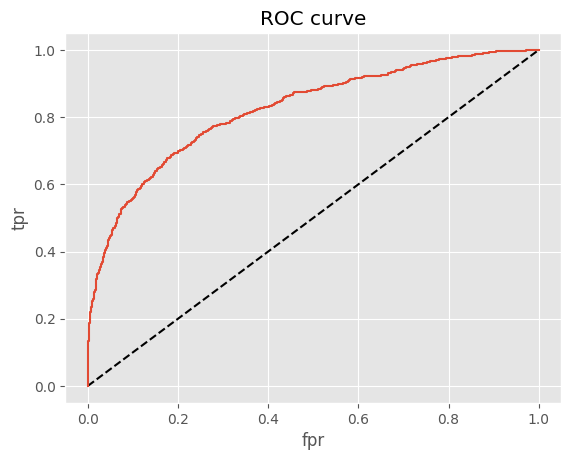

In [35]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [36]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8235028205600167

In [3]:
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras

In [4]:
import numpy as np
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow import keras

Evaluation of Multiple Training Instances

In [54]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

# Define your model building function
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=12))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# Create an instance of KerasClassifier with your model building function
classifier = KerasClassifier(build_fn=build_classifier, batch_size=64, epochs=10, verbose=1)  # Fixed the argument name

# Use a smaller dataset for demonstration
X_train_small = X_train[:1000]  # Using first 1000 samples
y_train_small = y_train[:1000]

# Perform cross-validation
accuracies = cross_val_score(estimator=classifier, X=X_train_small, y=y_train_small, cv=10)  # Removed the extra dot at the end

# Compute mean and variance of accuracies
mean = accuracies.mean()
variance = accuracies.std()

print("Mean Accuracy:", mean)
print("Accuracy Variance:", variance)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 2ms/step - loss: 0.6553 - accuracy: 0.7644
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7867
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.8089
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7778
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.8089
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.8089
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.8089
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.7978
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.8067
Epoch 10/10
2/2 [==============================] - 0s 6ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 2ms/step - loss: 0.6397 - accuracy: 0.6956
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.8089
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5426 - accuracy: 0.8089
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.8089
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.8089
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.8089
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.8089
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.8089
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.8089
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.8089
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.8089
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.8089
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.8089
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.8089
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.8089
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.8089
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.8089
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.8089
Epoch 10/10
2/2 [==============================] - 0s 7ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 5ms/step - loss: 0.7592 - accuracy: 0.7200
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.5525 - accuracy: 0.8000
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.8022
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5255 - accuracy: 0.8089
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5221 - accuracy: 0.8089
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5196 - accuracy: 0.8089
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.8089
Epoch 8/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5201 - accuracy: 0.8089
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.8089
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 3ms/step - loss: 1.7564 - accuracy: 0.6311
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.8214 - accuracy: 0.7122
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5758 - accuracy: 0.8089
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5590 - accuracy: 0.7978
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7844
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6098 - accuracy: 0.7767
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.7989
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7978
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.8089
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 2ms/step - loss: 1.6190 - accuracy: 0.8078
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.7978
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.8078
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.8078
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.8089
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.8089
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.8089
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.8089
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.8089
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 2ms/step - loss: 0.5576 - accuracy: 0.8089
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.8089
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.8089
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.8089
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.8089
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.8089
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.8089
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.8089
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.8089
Epoch 10/10
2/2 [==============================] - 0s 6ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 3ms/step - loss: 0.8707 - accuracy: 0.7722
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.8089
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5371 - accuracy: 0.8089
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.8089
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5351 - accuracy: 0.8089
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.8089
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.8089
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.8089
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.8089
Epoch 10/10
2/2 [==============================] - 0s 6ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 2s 2ms/step - loss: 0.5875 - accuracy: 0.7956
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.8089
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5409 - accuracy: 0.8089
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.8089
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5413 - accuracy: 0.8089
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.8089
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8089
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5490 - accuracy: 0.8078
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.8089
Epoch 10/10
2/2 [==============================] - 0s 6ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 3ms/step - loss: 0.8628 - accuracy: 0.7678
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.7256
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7867
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.8100
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.8100
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.8100
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.8100
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.8100
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.8100
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
Mean Accuracy: 0.8090000000000002
Accuracy Variance: 0.00300000000

In [55]:
print('Mean accuracy score of 10 different models using Kfold cross validation: {}'.format(mean))
print('Standard Deviation of accuracy score of 10 different models using Kfold cross validation: {}'.format(variance))

Mean accuracy score of 10 different models using Kfold cross validation: 0.8090000000000002
Standard Deviation of accuracy score of 10 different models using Kfold cross validation: 0.0030000000000000027


 Improving ANN with Dropout layer

 Dropout Regularization is used to reduce overfitting if needed.
p is the fraction of input units to drop. If suppose there are ten neurons from a layer and p is 0.1 then one of the neurons would be disabled and its output would not be sent to the further layer.
It is advisable to start with p 0.1 and move to higher values when in case the overfitting problem persists. Also going over 0.5 is not advisable generally because it may cause underfitting as most of the neurons are disabled.

In [56]:
# Improving the ANN
from tensorflow.keras.layers import Dropout
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 64, epochs = 50,verbose = 1)

Epoch 1/50
125/125 [==============================] - 2s 7ms/step - loss: 0.6808 - accuracy: 0.7401
Epoch 2/50
125/125 [==============================] - 1s 6ms/step - loss: 0.5387 - accuracy: 0.7836
Epoch 3/50
125/125 [==============================] - 1s 6ms/step - loss: 0.5340 - accuracy: 0.7926
Epoch 4/50
125/125 [==============================] - 1s 6ms/step - loss: 0.5259 - accuracy: 0.7944
Epoch 5/50
125/125 [==============================] - 1s 6ms/step - loss: 0.5258 - accuracy: 0.7945
Epoch 6/50
125/125 [==============================] - 1s 6ms/step - loss: 0.5219 - accuracy: 0.7945
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.7945
Epoch 8/50
125/125 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7945
Epoch 9/50
125/125 [==============================] - 0s 3ms/step - loss: 0.5144 - accuracy: 0.7945
Epoch 10/50
125/125 [==============================] - 1s 4ms/step - loss: 0.5140 - accuracy: 0.7945

In [57]:
# Part 3 - Making predictions and evaluating the model

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

800/800 [==============================] - 3s 4ms/step - loss: 0.5018 - accuracy: 0.7945
Train score: 0.5018396973609924
Train accuracy: 0.7944999933242798
63/63 [==============================] - 0s 5ms/step
********************
200/200 [==============================] - 1s 6ms/step - loss: 0.4910 - accuracy: 0.8035
Test score: 0.4909670352935791
Test accuracy: 0.8034999966621399


Text(0.5, 23.52222222222222, 'Predicted label')

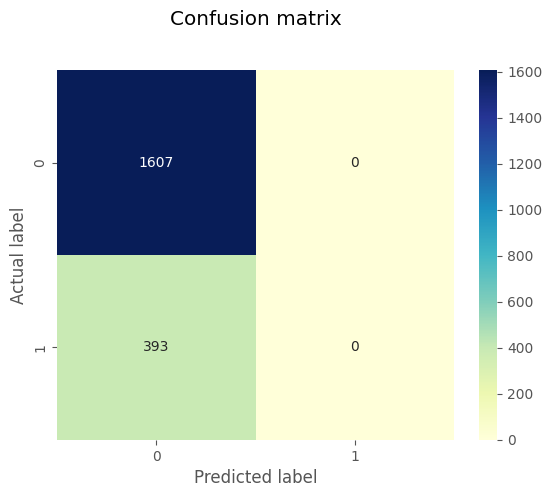

In [58]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 0s 4ms/step


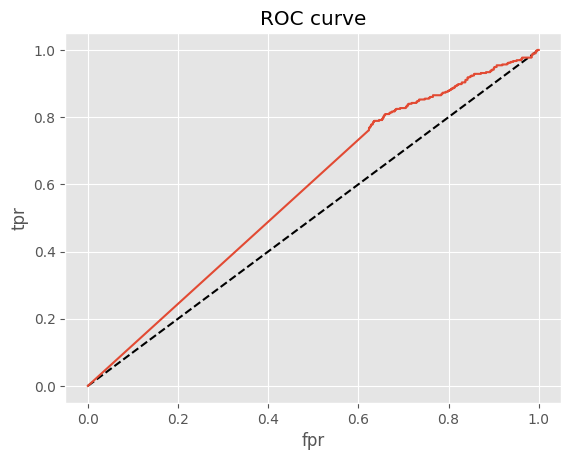

In [60]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [61]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5727447189538136

Tuning the ANN


Let's test 2 values of the batch size and we're gonna try 25 and 32. So why 25 and 32? Well, that's based on my experience and that's also common practice to take powers of 2. Well, you can try other values of the batch size as well.

In [74]:
from sklearn.model_selection import GridSearchCV

clf = KerasClassifier(
    model=get_clf,
    loss="binary_crossentropy",
    optimizer="adam",
    optimizer__lr=0.1,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.5,
    verbose=False,
)

In [75]:
params = {
    'optimizer__lr': [0.05, 0.1],
    'model__hidden_layer_sizes': [(100, ), (50, 50, )],
    'model__dropout': [0, 0.5],
}

gs = GridSearchCV(clf, params, scoring='accuracy', n_jobs=-1, verbose=True)

gs.fit(X, y)

print(gs.best_score_, gs.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


0.7963 {'model__dropout': 0.5, 'model__hidden_layer_sizes': (100,), 'optimizer__lr': 0.05}
